<a href="https://colab.research.google.com/github/complyservice/Data-science/blob/main/Analisando_dados_LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los Ageles City Dados do Airbnb


In [1]:
  import pandas as pd 
  import matplotlib.pyplot as plt
  import seaborn as sn 
  %matplotlib inline

In [2]:
df = pd.read_csv("https://bit.ly/2UGgeCi")

In [3]:
df = df.rename(columns={"name":"Nome"})
df.head(10)

,id,Nome,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,248
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.19,1,62
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,22,2019-08-31,0.33,2,252
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,140,1,20,2019-10-03,0.19,2,344
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0
5,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98833,-118.43224,Private room,75,30,305,2019-11-27,2.41,4,326
6,5729,Zen Room with Floating Bed near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98685,-118.43266,Private room,105,30,217,2019-11-20,1.74,4,300
7,5843,Artist Oasis near Venice Beach w/ Beautiful Ga...,9171,Sanni,City of Los Angeles,Del Rey,33.98782,-118.43170,Entire home/apt,303,1,114,2019-11-22,1.09,4,116
8,6033,Poolside Serenity Studio,11619,Sarah,City of Los Angeles,Woodland Hills,34.16825,-118.64438,Private room,85,3,22,2018-01-17,0.18,5,0
9,6931,Off Sunset Wrap-Around Terr Runyon Canyon View...,3008,Chas.,City of Los Angeles,Hollywood,34.09521,-118.34801,Private room,99,30,18,2019-11-01,0.14,2,250


In [4]:
#indentificar o volume de dados do DataFrame
print("Varaveis:\t{}".format(df.shape[0]))
print("Entradas:\t{}".format(df.shape[1]))

Varaveis:	40125
Entradas:	16


In [5]:
#identificar as 5 primeiras entradas do dataset
display(df.dtypes)

id                                  int64
Nome                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
#ordenar em ordem decresente as variaveis por seus valores ausentes
n = (df.isnull().sum()/df.shape[0]).sort_values(ascending = False)
df_n = pd.DataFrame(n)
df_n.style.format("{:.2%}")

,0
reviews_per_month,20.30%
last_review,20.30%
host_name,1.08%
Nome,0.00%
availability_365,0.00%
calculated_host_listings_count,0.00%
number_of_reviews,0.00%
minimum_nights,0.00%
price,0.00%
room_type,0.00%


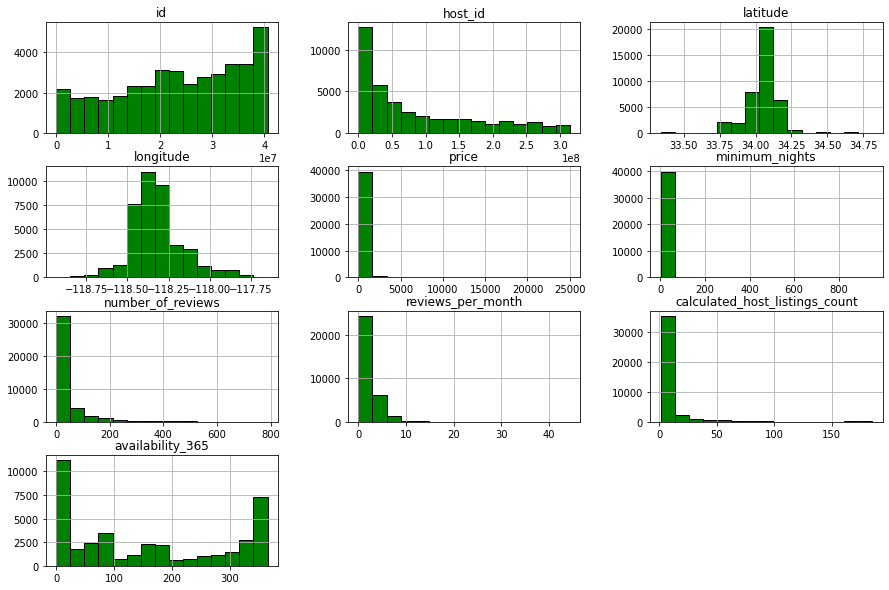

In [7]:
#Para indentificar a distribuicao das variaveis numericas Plotar histograma
df.hist(bins = 15,color='green',edgecolor='black', figsize = (15,10));

In [9]:
#ver a media da coluna price (media de valores de alugueis na cidade de Los Angels)
df["price"].mean()

225.84067289719627

In [11]:
# ver o resumo estatistico das variaveis numericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,40125.000000,40125.000000,40125.000000,31980.000000,40125.000000,40125.000000
mean,225.840673,10.867688,34.082069,1.870650,7.659539,158.237458
std,656.723597,20.848665,61.568212,1.971808,19.448746,139.786661
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,1.000000,1.000000,0.360000,1.000000,7.000000
50%,110.000000,2.000000,8.000000,1.150000,2.000000,133.000000
75%,189.000000,30.000000,39.000000,2.820000,5.000000,317.000000
max,25000.000000,950.000000,788.000000,44.380000,185.000000,365.000000


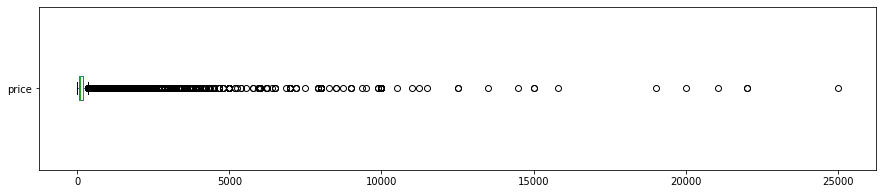


price: valores acima de 660
1838 entradas
4.58%


In [15]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 660 para price
print("\nprice: valores acima de 660")
print("{} entradas".format(len(df[df.price > 660])))
print("{:.2f}%".format((len(df[df.price > 660]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

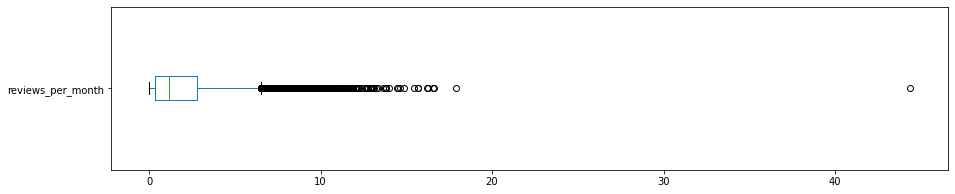

reviews per month: valores acima de 2
11219 entradas
27.96%


In [16]:
# reviews per month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 2 para reviews per month
print("reviews per month: valores acima de 2")
print("{} entradas".format(len(df[df.reviews_per_month > 2])))
print("{:.2f}%".format((len(df[df.reviews_per_month > 2]) / df.shape[0])*100))

# df.reviews_per_month.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

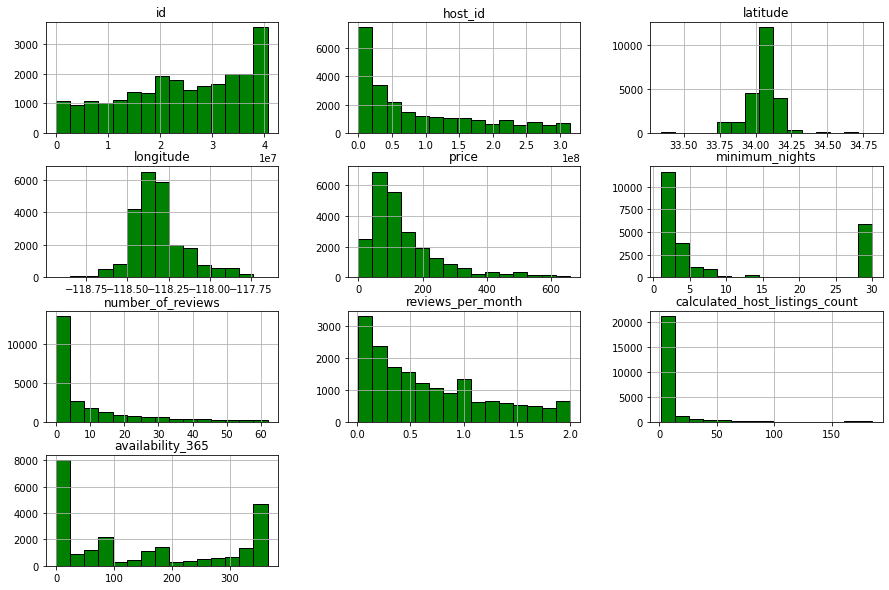

In [17]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 660].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 62].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 2].index, axis=0, inplace=True)
# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15,color='green',edgecolor='black', figsize=(15,10));

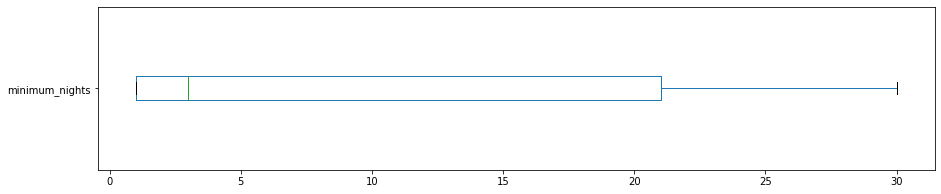


minimum_nights: valores acima de 30 noites:
0 entradas
0.00%

minimum_nights: valores abaixo de 30 noites:
24013 entradas
100.00%
40125

minimum_nights: valores abaixo de 15 noites:
17831 entradas
74.26%

minimum_nights: valores abaixo de 5 noites:
15403 entradas
64.14%


In [18]:
# minimum_nights
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()


# ver quantidade de valores acima de 30 dias para minimum_nights
print("\nminimum_nights: valores acima de 30 noites:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights > 30])))
print("{:.2f}%".format((len(df_clean[df_clean.minimum_nights > 30]) / df_clean.shape[0])*100))

print("\nminimum_nights: valores abaixo de 30 noites:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights <= 30])))
print("{:.2f}%".format((len(df_clean[df_clean.minimum_nights <= 30]) / df_clean.shape[0])*100))
print(df.shape[0])

print("\nminimum_nights: valores abaixo de 15 noites:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights < 15])))
print("{:.2f}%".format((len(df_clean[df_clean.minimum_nights < 15]) / df_clean.shape[0])*100))

print("\nminimum_nights: valores abaixo de 5 noites:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights < 5])))
print("{:.2f}%".format((len(df_clean[df_clean.minimum_nights < 5]) / df_clean.shape[0])*100))

In [21]:
# criar uma matriz de correlacao
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.028916,-0.027567,-0.012953,0.074578,0.089677
minimum_nights,-0.028916,1.000000,-0.036553,-0.152831,0.208689,0.075140
number_of_reviews,-0.027567,-0.036553,1.000000,0.463670,-0.098888,0.077805
reviews_per_month,-0.012953,-0.152831,0.463670,1.000000,-0.017206,0.082578
calculated_host_listings_count,0.074578,0.208689,-0.098888,-0.017206,1.000000,0.174181
availability_365,0.089677,0.075140,0.077805,0.082578,0.174181,1.000000


In [24]:
# mostrar a quantidade de cada tipo de imovel disponivel
df_clean.room_type.value_counts()

Entire home/apt    13424
Private room        9156
Shared room         1196
Hotel room           237
Name: room_type, dtype: int64

In [25]:
#mostrar porcentagem de cada tipo de imovel disponivel
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.559031
Private room       0.381293
Shared room        0.049806
Hotel room         0.009870
Name: room_type, dtype: float64

Com base nas informacoes apontadas acima , podemos afirmar que o Casa/Apartamento inteiro tem mais procuras por locacoes.
Casa/Apartamento = 14.424-55%
Sala privada = 9.156-38%
Quarto compartilhado = 1.196 - 1%
Quarto de Hotel = 237 - Menos de 1%

In [27]:
#ver preco por bairro na media
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Unincorporated Catalina Island           571.500000
Avalon                                   433.154930
Malibu                                   353.262712
Tujunga Canyons                          312.500000
Universal City                           309.000000
Beverly Crest                            295.660714
Unincorporated Santa Monica Mountains    290.611111
Bel-Air                                  286.464286
Pacific Palisades                        276.827957
Century City                             267.272727
Name: price, dtype: float64

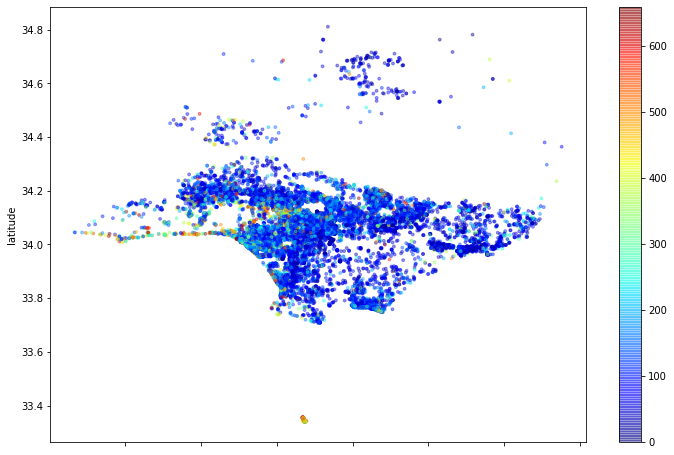

In [28]:
# plotar os imoveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [29]:
# ver a media da coluna "minimum_nights".media local por noite 
df["minimum_nights"].mean()

10.86768847352025